# WALMART WEEKLY SALES ANALYSIS

#### Importing needed libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#### Reading the walmart weekly sales data into pandas dataframe

In [2]:
df = pd.read_csv('walmart weekly sales.csv', parse_dates = ['Date'])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


#### Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


### 1. Which store had the highest sales per week
#### -Was it a holiday week for that store
#### -In which month was this week
#### -How much did they make in sales that week

In [7]:
df.loc[(df['Weekly_Sales'] == df['Weekly_Sales'].max())]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724


Store 14 recorded the highest sales per week with $3,818,686.45 in December 2010 which was not a holiday week.

### 2. If their weekly sales increase by 7%, what would their new sales be?

In [8]:
# Inserting a new column with 7% increase on sales
df['Weekly_Sales(7% increase)'] = df['Weekly_Sales'] * 1.07
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase)
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.758749e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1.756894e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.724806e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.508409e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.663643e+06
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,7.630961e+05
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,7.847969e+05
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,7.858769e+05
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,7.683943e+05


### 3. Assuming Walmart's labour cost 28.6% of their weekly sales, product cost is 39% and maintenance is 12.4% how much profit will each store make

In [13]:
# Inserting columns for labour cost, product cost,maintenance and profit
df['labour cost'] = df['Weekly_Sales'] * 0.286
df['product cost'] = df['Weekly_Sales'] * 0.39
df['maintenance'] = df['Weekly_Sales'] * 0.124
df['profit'] = df['Weekly_Sales'] - (df['labour cost']+df['product cost']+df['maintenance'])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase),labour cost,product cost,maintenance,profit
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.758749e+06,470095.59740,641039.4510,203817.67160,328738.180
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1.756894e+06,469599.82784,640363.4016,203602.72256,328391.488
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.724806e+06,461022.89662,628667.5863,199884.05308,322393.634
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.508409e+06,403182.09074,549793.7601,174806.22116,281945.518
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.663643e+06,444674.71048,606374.6052,192796.02832,310961.336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,7.630961e+05,203967.74970,278137.8405,88433.56980,142634.790
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,7.847969e+05,209768.15002,286047.4773,90948.42868,146691.014
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,7.858769e+05,210056.80696,286441.1004,91073.58064,146892.872
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,7.683943e+05,205383.90158,280068.9567,89047.56572,143625.106


In [22]:
# Profit that each store will make
df.groupby('Store')['profit'].sum()

Store
1     4.448056e+07
2     5.507649e+07
3     1.151735e+07
4     5.990879e+07
5     9.095138e+06
6     4.475123e+07
7     1.631966e+07
8     2.599024e+07
9     1.555784e+07
10    5.432354e+07
11    3.879256e+07
12    2.885745e+07
13    5.730354e+07
14    5.779998e+07
15    1.782674e+07
16    1.485049e+07
17    2.555643e+07
18    3.102295e+07
19    4.132697e+07
20    6.027956e+07
21    2.162358e+07
22    2.941513e+07
23    3.975012e+07
24    3.880320e+07
25    2.021224e+07
26    2.868328e+07
27    5.077118e+07
28    3.785274e+07
29    1.542831e+07
30    1.254338e+07
31    3.992278e+07
32    3.336385e+07
33    7.432044e+06
34    2.764995e+07
35    2.630413e+07
36    1.068244e+07
37    1.484055e+07
38    1.103193e+07
39    4.148911e+07
40    2.757406e+07
41    3.626839e+07
42    1.591315e+07
43    1.811309e+07
44    8.658618e+06
45    2.247907e+07
Name: profit, dtype: float64

### 4. Temperature are in Fahrenheit, convert them to celsius if you need to and answer the following questions
#### -which store had the lowest temperature (cold day)
#### -which store had the highest temperature (hot day)
#### -how do weekly sales of these stores compare in these temperatures
#### -can you draw any meaning on how the weather affect Walmart's sales?


In [25]:
# inserting a column for temperature in celsius
df['Temp in Cels'] = (df['Temperature'] - 32) * .5556
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase),labour cost,product cost,maintenance,profit,Temp in Cels
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.758749e+06,470095.59740,641039.4510,203817.67160,328738.180,5.728236
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1.756894e+06,469599.82784,640363.4016,203602.72256,328391.488,3.616956
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.724806e+06,461022.89662,628667.5863,199884.05308,322393.634,4.405908
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.508409e+06,403182.09074,549793.7601,174806.22116,281945.518,8.128428
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.663643e+06,444674.71048,606374.6052,192796.02832,310961.336,8.056200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,7.630961e+05,203967.74970,278137.8405,88433.56980,142634.790,18.268128
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,7.847969e+05,209768.15002,286047.4773,90948.42868,146691.014,18.273684
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,7.858769e+05,210056.80696,286441.1004,91073.58064,146892.872,12.484332
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,7.683943e+05,205383.90158,280068.9567,89047.56572,143625.106,13.595532


#### Store with the lowest temperature

In [26]:
df.loc[(df['Temp in Cels'] == df['Temp in Cels'].min())]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase),labour cost,product cost,maintenance,profit,Temp in Cels
910,7,2011-02-04,558027.77,0,-2.06,3.011,191.762589,8.818,597089.7139,159595.94222,217630.8303,69195.44348,111605.554,-18.923736


Store 7 is the store that recorded the lowest temperature (-18.92 degrees celsius)

#### Store with the highest temperature

In [27]:
df.loc[(df['Temp in Cels'] == df['Temp in Cels'].max())]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase),labour cost,product cost,maintenance,profit,Temp in Cels
4599,33,2010-07-16,280937.84,0,100.14,2.971,126.149806,9.495,300603.4888,80348.22224,109565.7576,34836.29216,56187.568,37.858584


Store 33 is the store that recorded the highest temperature (37.86 degrees celsius)

### how do weekly sales of these stores compare in these temperatures?

##### Store 7 in the lowest temperature recorded week sales of 558,027.77 which is more than the week sales Store 33 made in the highest temperature with 280,937.84

### how the weather affect walmart sales?

In [29]:
# using correlation
df['Weekly_Sales'].corr(df['Temp in Cels'])

-0.06381001317946954

A correlation coeffiecient of -0.064 indicates a weak negative relationship between temperature and weekly sales of Walmart indicating that temperature doesn't really affect weekly sales

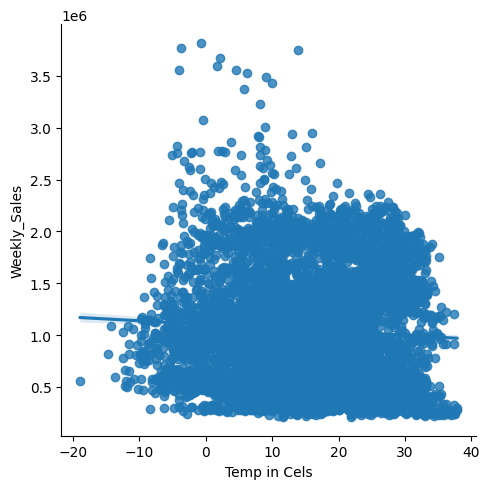

In [111]:
# using scatterplot (scatterplot, lmplot or regplot)
sns.lmplot(data = df, x = 'Temp in Cels', y = 'Weekly_Sales')
plt.show()

The scatterplot shows a weak negative correlation ( direction of the line and arrangement of the plots) between temperature and weekly sales indicating temperature might not necessarily affect weekly sales.

### 5. Which store had the highest sales week in 2012?

In [71]:
# creating a new dataset for 2012
df_2012 = df.loc[(df['Date'].dt.year == 2012)]
df_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase),labour cost,product cost,maintenance,profit,Temp in Cels
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,1.658896e+06,443405.79712,604644.2688,192245.87008,310073.984,9.450756
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,1.561773e+06,417445.93462,569244.4563,180990.54508,291920.234,9.184068
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,1.492001e+06,398796.63824,543813.5976,172904.83616,278878.768,12.284316
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,1.411678e+06,377327.11874,514536.9801,163596.37316,263865.118,12.367656
104,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,1.750883e+06,467993.13990,638172.4635,202906.11660,327267.930,13.639980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,7.630961e+05,203967.74970,278137.8405,88433.56980,142634.790,18.268128
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,7.847969e+05,209768.15002,286047.4773,90948.42868,146691.014,18.273684
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,7.858769e+05,210056.80696,286441.1004,91073.58064,146892.872,12.484332
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,7.683943e+05,205383.90158,280068.9567,89047.56572,143625.106,13.595532


In [72]:
df_2012.loc[(df_2012['Weekly_Sales'] == df_2012['Weekly_Sales'].max())]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase),labour cost,product cost,maintenance,profit,Temp in Cels
2830,20,2012-04-06,2565259.92,0,50.06,3.996,214.238705,7.139,2.744828e+06,733664.33712,1.000451e+06,318092.23008,513051.984,10.034136


Store 20 had the highest sales week in 2012. They recorded a week sales of $2,565,259.92 in the first week of April, 2012.

### 6. When fuel prices were above $3.50, how many stores made 1,000,000.00 in weekly sales?

In [75]:
df2 = df.loc[((df['Fuel_Price'] > 3.5) & (df['Weekly_Sales'] > 1000000))]
df2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase),labour cost,product cost,maintenance,profit,Temp in Cels
60,1,2011-04-01,1495064.75,0,59.17,3.524,214.837166,7.682,1.599719e+06,427588.51850,583075.2525,185388.02900,299012.950,15.095652
61,1,2011-04-08,1614259.35,0,67.84,3.622,215.074394,7.682,1.727258e+06,461678.17410,629561.1465,200168.15940,322851.870,19.912704
62,1,2011-04-15,1559889.00,0,71.27,3.743,215.291856,7.682,1.669081e+06,446128.25400,608356.7100,193426.23600,311977.800,21.818412
63,1,2011-04-22,1564819.81,0,72.99,3.807,215.459905,7.682,1.674357e+06,447538.46566,610279.7259,194037.65644,312963.962,22.774044
64,1,2011-04-29,1455090.69,0,72.03,3.810,215.627954,7.682,1.556947e+06,416155.93734,567485.3691,180431.24556,291018.138,22.240668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5858,41,2012-09-28,1307928.01,0,56.08,3.789,198.590328,6.432,1.399483e+06,374067.41086,510091.9239,162183.07324,261585.602,13.378848
5859,41,2012-10-05,1400160.95,0,50.14,3.779,198.822132,6.195,1.498172e+06,400446.03170,546062.7705,173619.95780,280032.190,10.078584
5860,41,2012-10-12,1409544.97,0,39.38,3.760,199.053937,6.195,1.508213e+06,403129.86142,549722.5383,174783.57628,281908.994,4.100328
5861,41,2012-10-19,1326197.24,0,49.56,3.750,199.148196,6.195,1.419031e+06,379292.41064,517216.9236,164448.45776,265239.448,9.756336


In [78]:
df2['Store'].nunique()

27

When fuel prices were above $3.5, 27 Stores made above 1,000,000.00 in weekly sales

### 7. How much did each store make, during christmas week in 2012?

There is no data for December 2012

### 8. How many weeks had a holiday in 2011?

In [94]:
df_2011 = df.loc[(df['Date'].dt.year == 2011)]
df_2011

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase),labour cost,product cost,maintenance,profit,Temp in Cels
48,1,2011-01-07,1444732.28,0,48.27,2.976,211.404742,7.742,1.545864e+06,413193.43208,563445.5892,179146.80272,288946.456,9.039612
49,1,2011-01-14,1391013.96,0,35.40,2.983,211.457411,7.742,1.488385e+06,397829.99256,542495.4444,172485.73104,278202.792,1.889040
50,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742,1.420324e+06,379637.95012,517688.1138,164598.27208,265481.084,6.689424
51,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742,1.409082e+06,376633.20266,513590.7309,163295.51444,263379.862,6.572748
52,1,2011-02-04,1606629.58,0,42.27,2.989,212.566881,7.742,1.719094e+06,459496.05988,626585.5362,199222.06792,321325.916,5.706012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,45,2011-12-02,875699.81,0,50.19,3.452,188.502435,8.523,9.369988e+05,250450.14566,341522.9259,108586.77644,175139.962,10.106364
6388,45,2011-12-09,957155.31,0,46.57,3.415,188.654469,8.523,1.024156e+06,273746.41866,373290.5709,118687.25844,191431.062,8.095092
6389,45,2011-12-16,1078905.68,0,39.93,3.413,188.797935,8.523,1.154429e+06,308567.02448,420773.2152,133784.30432,215781.136,4.405908
6390,45,2011-12-23,1521957.99,0,42.27,3.389,188.929975,8.523,1.628495e+06,435279.98514,593563.6161,188722.79076,304391.598,5.706012


In [97]:
(df_2011.groupby('Date')['Holiday_Flag'].sum()/45).sum()

4.0

Since each value in the 'Date' column appears 45 times (number of stores), I group by date and sum values in the 'Holiday_Flag' column (0s and 1s) and divide by the number of times each date appear. After this, the output I get shows if a holiday happened in that week of 2011 or not with 1 showing that a holiday happened in that week and 0 indicating otherwise. The outcome shows only 4 weeks had a holiday in 2011.

### 9. In which week was unemployment the highest in 2012?

In [101]:
df2012_high_unemployment = df_2012.loc[(df_2012['Unemployment'] == df_2012['Unemployment'].max())]
df2012_high_unemployment

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales(7% increase),labour cost,product cost,maintenance,profit,Temp in Cels
1673,12,2012-01-06,945823.65,0,50.43,3.599,130.157516,12.187,1.012031e+06,270505.56390,368871.2235,117282.13260,189164.730,10.239708
1674,12,2012-01-13,865467.86,0,48.07,3.657,130.244000,12.187,9.260506e+05,247523.80796,337532.4654,107318.01464,173093.572,8.928492
1675,12,2012-01-20,855922.64,0,46.20,3.660,130.279226,12.187,9.158372e+05,244793.87504,333809.8296,106134.40736,171184.528,7.889520
1676,12,2012-01-27,888203.69,0,50.43,3.675,130.314452,12.187,9.503779e+05,254026.25534,346399.4391,110137.25756,177640.738,10.239708
1677,12,2012-02-03,1058767.95,0,50.58,3.702,130.349677,12.187,1.132882e+06,302807.63370,412919.5005,131287.22580,211753.590,10.323048
1678,12,2012-02-10,1199330.85,1,52.27,3.722,130.384903,12.187,1.283284e+06,343008.62310,467739.0315,148717.02540,239866.170,11.262012
1679,12,2012-02-17,1240048.85,0,51.80,3.781,130.454621,12.187,1.326852e+06,354653.97110,483619.0515,153766.05740,248009.770,11.000880
1680,12,2012-02-24,1112034.72,0,53.13,3.950,130.550207,12.187,1.189877e+06,318041.92992,433693.5408,137892.30528,222406.944,11.739828
1681,12,2012-03-02,1147636.96,0,52.27,4.178,130.645793,12.187,1.227972e+06,328224.17056,447578.4144,142306.98304,229527.392,11.262012
1682,12,2012-03-09,1113208.57,0,54.54,4.250,130.741379,12.187,1.191133e+06,318377.65102,434151.3423,138037.86268,222641.714,12.523224


In [105]:
df2012_high_unemployment['Date'].unique()

<DatetimeArray>
['2012-01-06 00:00:00', '2012-01-13 00:00:00', '2012-01-20 00:00:00',
 '2012-01-27 00:00:00', '2012-02-03 00:00:00', '2012-02-10 00:00:00',
 '2012-02-17 00:00:00', '2012-02-24 00:00:00', '2012-03-02 00:00:00',
 '2012-03-09 00:00:00', '2012-03-16 00:00:00', '2012-03-23 00:00:00',
 '2012-03-30 00:00:00']
Length: 13, dtype: datetime64[ns]

Unemployment were high in these weeks(13) of 2012, hitting 12.187 in all these 13 weeks.

### 10. Which year was most profitable for Walmart?

In [115]:
year_profit = df.groupby(df['Date'].dt.year)['profit'].sum().sort_values(ascending= False)
year_profit

Date
2011    4.896400e+08
2010    4.577772e+08
2012    4.000266e+08
Name: profit, dtype: float64

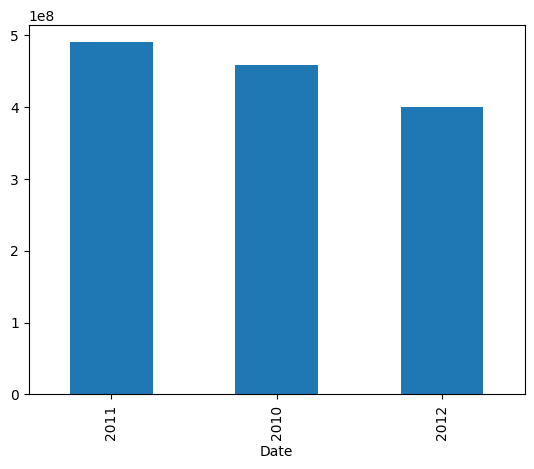

In [126]:
year_profit.plot.bar()
plt.show()

From the graph, it can be seen that 2011 their most profitable year among these years.